# Disclaimer & Copyright

Copyright 2024 Forusone : shins777@gmail.com

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Gemini - Stock image analysis, understanding numbers and meaning in the fiancial market
* This notebook explains how to use Gemini to understand images in multimodality features of Gemini.  
* This code shows how the Gemini multimodality understands financial information such as terms, jargon and specific meaningful numbers in the stock market.
* Refer to the link for more information about the Gemini
 * ***https://cloud.google.com/vertex-ai/generative-ai/docs/learn/overview***

# Configuration
## Install aiplatform library
* Vertex AI SDK for Python
  * https://cloud.google.com/python/docs/reference/aiplatform/latest
* Vertex AI initialization : aiplatform.init(..)
  * https://cloud.google.com/python/docs/reference/aiplatform/latest#initialization

In [ ]:
%pip install --upgrade --quiet google-cloud-aiplatform

In [ ]:
from IPython.display import display, Markdown

## Authentication to access to the GCP

* Use OAuth to access the GCP environment.
 * Refer to the authentication methods in GCP : https://cloud.google.com/docs/authentication?hl=ko

In [ ]:
#  For only colab to authenticate to get an access to the GCP.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()


## Mount to the google drive to access the .ipynb files in the repository.


In [ ]:
# To access contents in Google drive

if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image source
* Google search : Kospi
* Don't use the following image for other purpose.

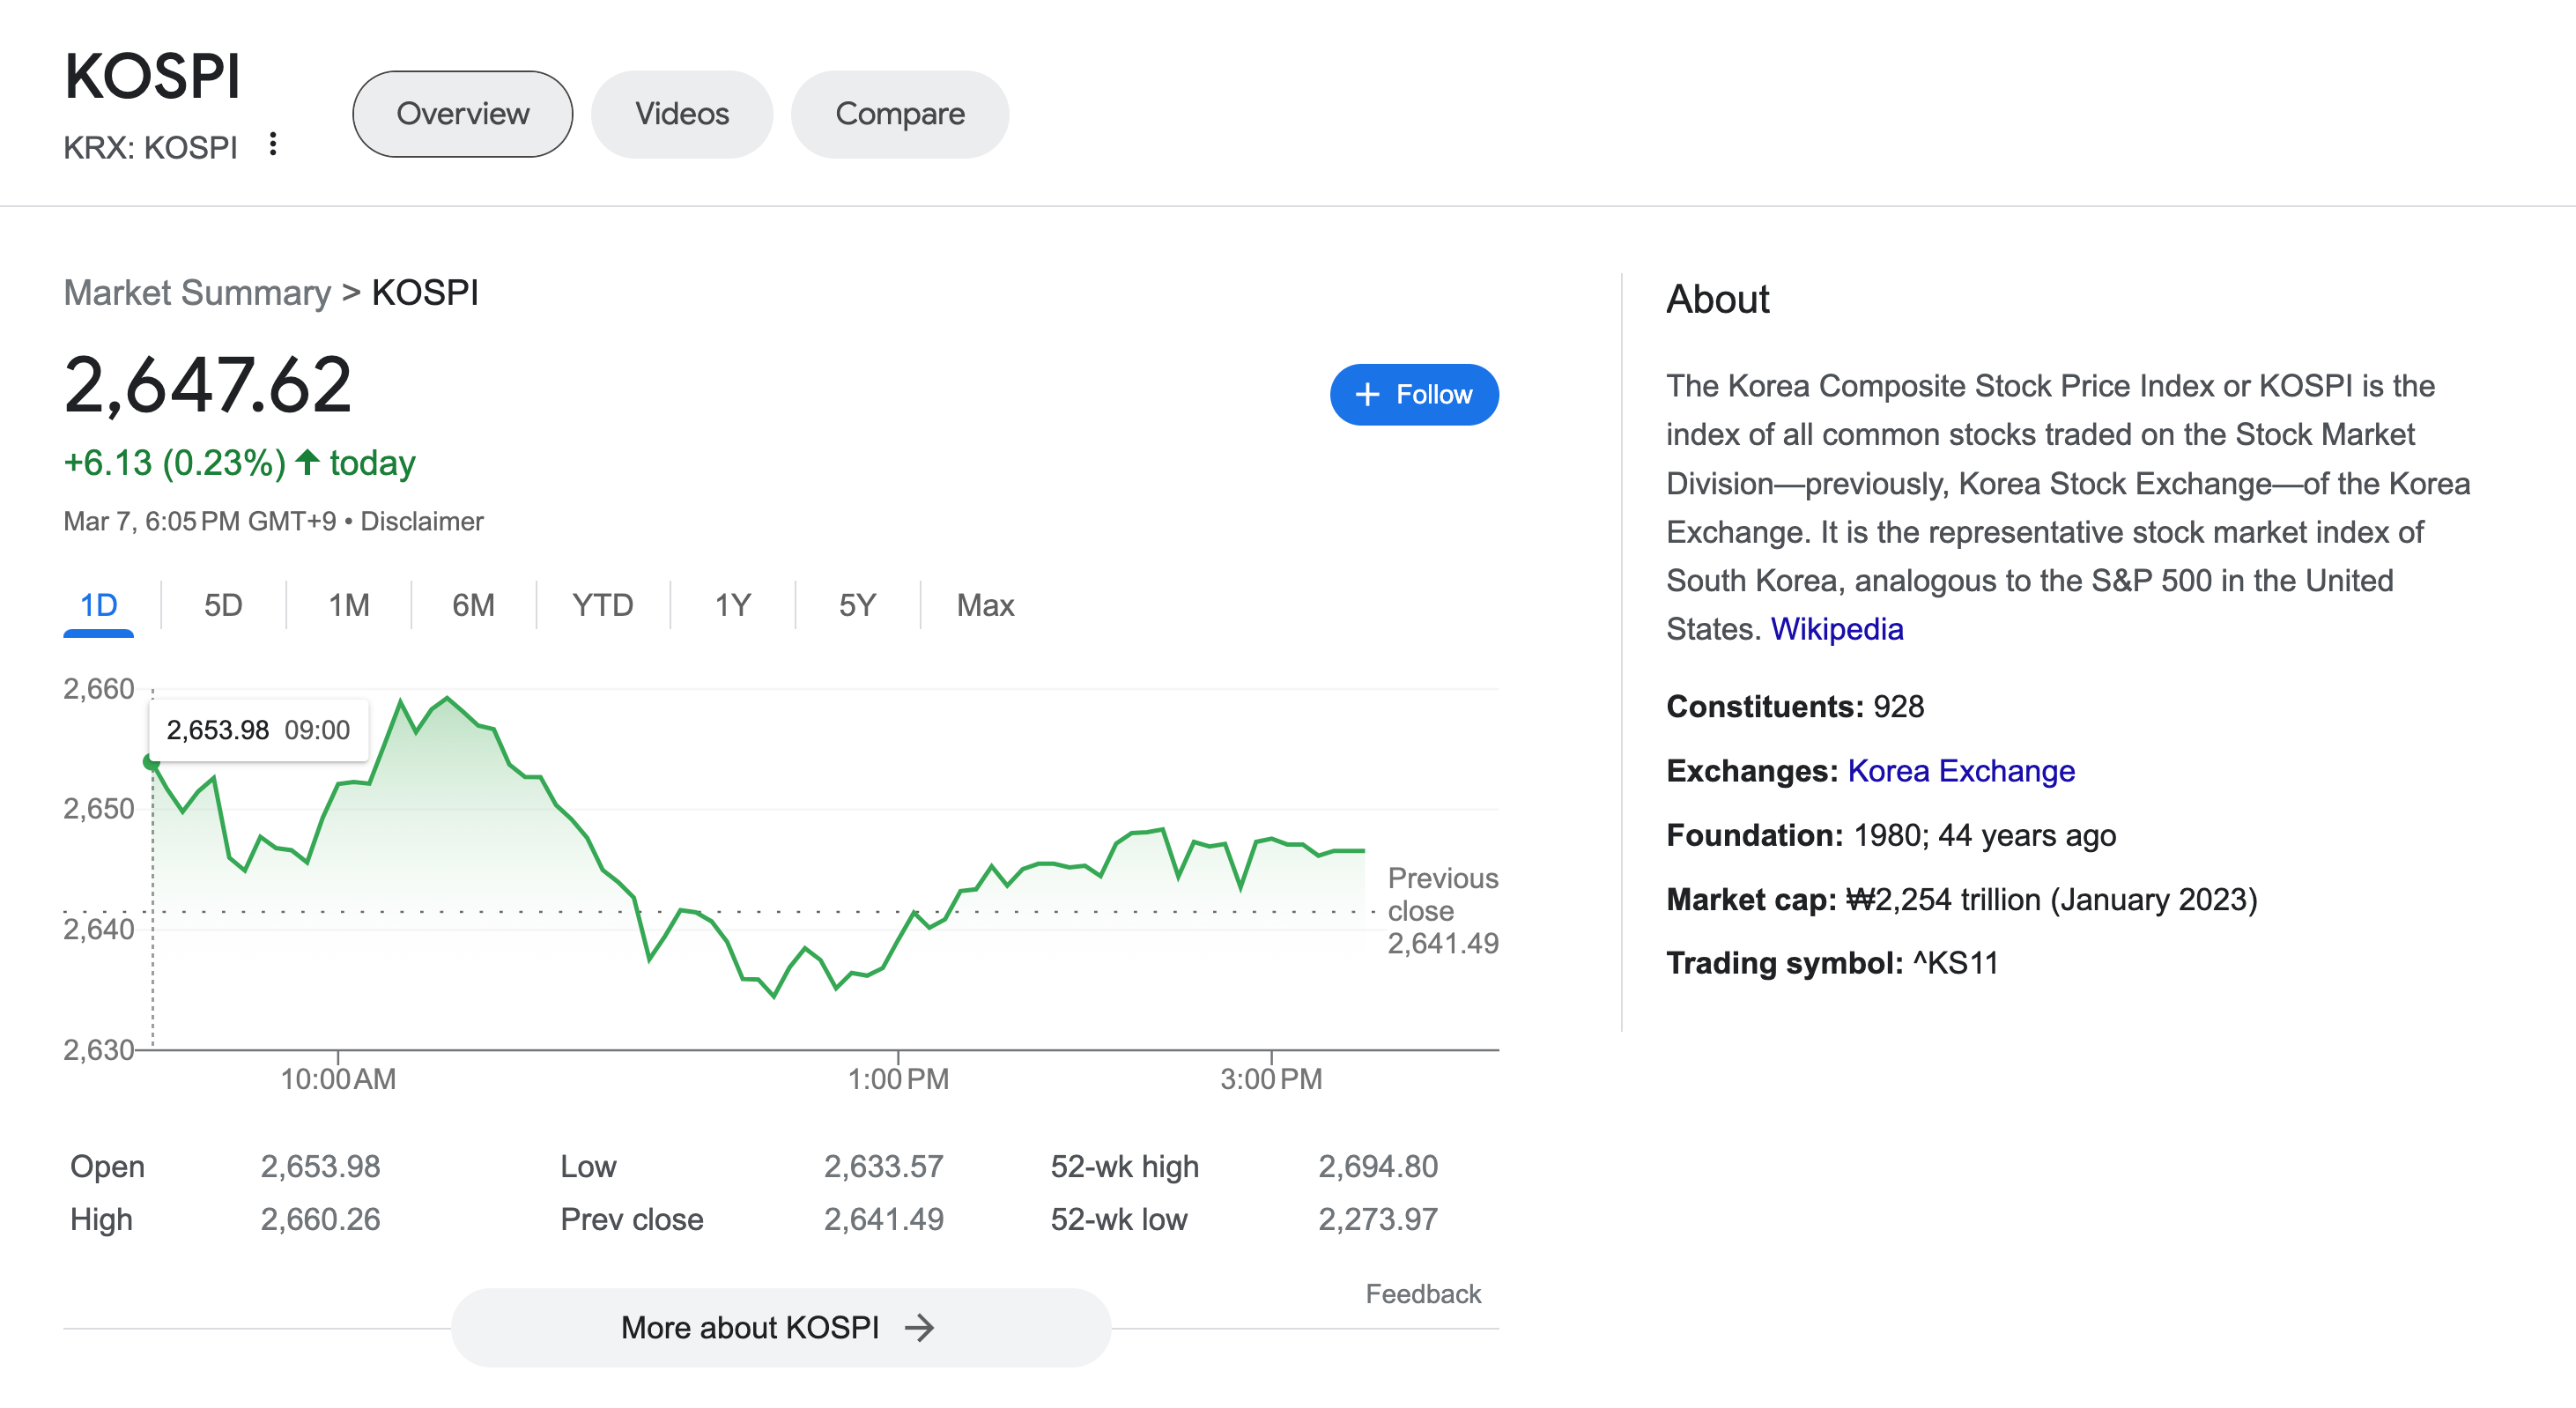

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/projects/google_gen_ai_sample/contents/images/Kospi.png', width=1100, height=600)

# Execute the example
## Set the environment on GCP Project
* Configure project information
  * Model name : LLM model name : https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models
  * Project Id : prodect id in GCP
  * Region : region name in GCP

In [ ]:
MODEL_NAME="gemini-1.5-flash"
PROJECT_ID="ai-hangsik"
REGION="asia-northeast3"

## Vertex AI initialization
Configure Vertex AI and access to the foundation model.

In [ ]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part
import vertexai.preview.generative_models as generative_models

# Initalizate the current vertex AI execution environment.
vertexai.init(project=PROJECT_ID, location=REGION)

# Access to the generative model.
model = GenerativeModel(MODEL_NAME)

## Encoding function for multimodality

In [ ]:
import base64

def get_encoded_content(location_type, location, mime_type ):
  """
  Get the encoded content object.

  location_type :
    The type of the location. ( local or GCS )
  location :
    The file location of the content.
  mime_type :
    The mime type of the content.

  Returns:
    The encoded content object.

  """

  content_obj = None

  if location_type == "local":
    with open(location, 'rb') as f:
      raw_obj = base64.b64encode(f.read()).decode('utf-8')
      content_obj = Part.from_data(data=base64.b64decode(raw_obj), mime_type=mime_type)

  elif location_type == "GCS":
        content_obj = Part.from_uri(location, mime_type=mime_type)
  else:
    raise ValueError("Invalid location type.")

  return content_obj

## Get responses from Gemini

In [ ]:

def generate(content_obj, query:str):
    """
    Generate a response from the model.

    content_obj :
      encoded object being analyzed in the process
    query :
      query to be sent to the model

    Returns:
      The generated response.

    """

    # Set model parameter : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/send-multimodal-prompts#set_model_parameters
    generation_config = {
        "max_output_tokens": 8192,
        "temperature": 1,
        "top_p": 0.95,
    }

    # Configure satey setting : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/configure-safety-attributes
    # Refer to the link to remove : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/configure-safety-attributes#how_to_remove_automated_response_blocking_for_select_safety_attributes
    safety_settings = {
        generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    }

    responses = model.generate_content(
        [content_obj, query],
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=False,
    )

    return responses.text

In [ ]:
from time import perf_counter

t1_start = perf_counter()

# When using local storage for the file location.
location_type = "local"
mime_type = "image/png"

repository_root = "/content/drive/MyDrive/projects"
file_path = "/google_gen_ai_sample/contents/images/Kospi.png"
location = repository_root + file_path

content_obj = get_encoded_content(location_type, location, mime_type )

prompt = """You are an AI assistant helping people understand the stock chart.
 Explain the stock chart in detail.
 1. When is the date?
 2. What is the highest price in 52 weeks?
 3. Predict the price of the next day.
 4. What are the data sources of this chart?
"""

outcome = generate(content_obj, prompt)

t1_end  = perf_counter()
print(f"Time : {t1_end - t1_start} seconds\n\n")

display(Markdown(outcome))


# When using Google Cloud Storage for the location type.

# location_type = "GCS"
# mime_type = "image/jpeg"
# repository_root = "gs://bucket_name"
# file_path = "/Kospi.jpeg"
# location = repository_root + file_path


Time : 5.548445160000028 seconds




Here's the breakdown of the stock chart:

1. The date is March 7, 6:05 PM GMT+9.
2. The highest price in 52 weeks is 2,694.80.
3. It's difficult to predict the price of the next day with certainty. Stock prices are influenced by various factors, making precise predictions impossible.  However, based on the recent trend, the price could potentially continue to rise, but also could decrease, staying within a range.
4. The data source for the chart is likely a financial data provider like Google Finance, Yahoo Finance, or a similar platform.

Feel free to ask any further questions.